57220902 319359036


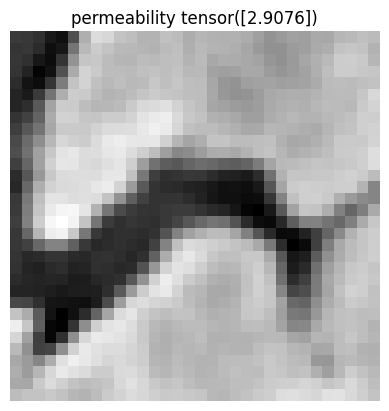

In [1]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
from iapytoo.utils.config import Config, ConfigFactory
from rockai.dataset.dataset import Drp3dSqliteDataset
from rockai.dataset.config import Drp3dDatasetConfig

config_path = Path("/work/lecomtje/Repositories/iapy/iapy_drp/tests/config.yml")
config: Config = ConfigFactory.from_yaml(config_path)
dataset_config : Drp3dDatasetConfig = config.dataset
def unormalize(value):
    return int(value.item()*dataset_config.std + dataset_config.mean)

dataset = Drp3dSqliteDataset(config, train_flag="train")
idx = 3456
cube, y= dataset[idx]
print(unormalize(torch.min(cube)), unormalize(torch.max(cube)))

plt.imshow(cube[0, :, : , cube.shape[3] // 2], cmap='gray')
plt.title(f"permeability {y}")
_ = plt.axis('off') 


SELECT RTX, GROUP_CONCAT(permeability, ', ') AS value FROM dataset GROUP BY RTX;


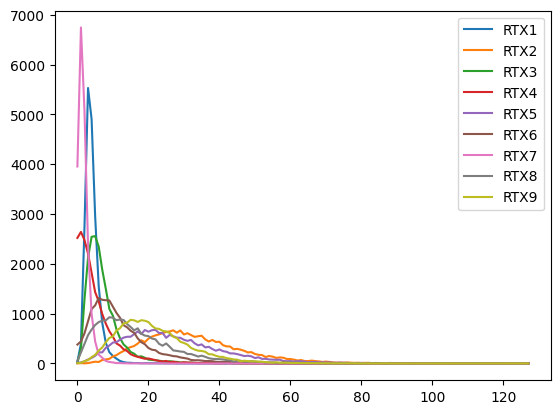

In [2]:
import pandas as pd
import numpy as np
from rockai.dataset.sqlite_dataset import SqliteDataset

with SqliteDataset(db_path=dataset_config.db) as db:
    perm_by_groups = db.get_values_by_group()


for k, v in perm_by_groups.items():
    hist, bins = np.histogram(v, 128)
    plt.plot(hist, label=k)
plt.legend(loc="upper right")  




min 0.0, max 96.10029
min 0.0, max 91.308426
min 0.010797983, max 2.8459628
min 0.0, max 99.97904
min 0.0, max 86.36878
min 0.07597395, max 5.9582353


(0.0, 30.0)

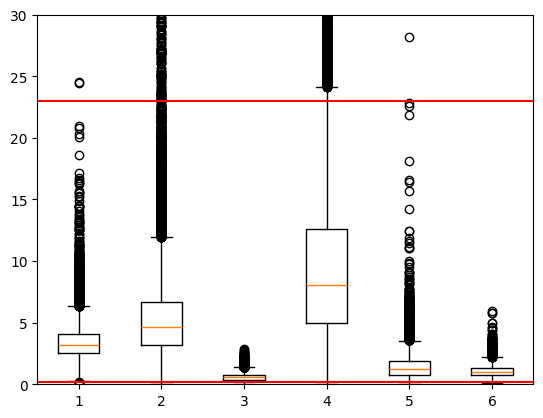

In [3]:
values = []
for k, v  in perm_by_groups.items():
    if k == 'RTX2' or k == 'RTX4' or k == 'RTX8':
        continue
    print(f"min {np.min(perm_by_groups[k])}, max {np.max(perm_by_groups[k])}")
    values.append(v)
plt.boxplot(values)
plt.axhline(y=0.2, color='r', linestyle='-')
plt.axhline(y=23, color='r', linestyle='-')
plt.ylim(0, 30)
 

In [3]:
permeabilities = {
    4419: [],
    4420: []
}
for idx, item in tqdm(enumerate(dataset)):
    _, perm = item
    permeabilities[dataset.cube_id(idx)].append(perm[0].item())


4806it [00:02, 1884.59it/s]


In [4]:
print(permeabilities.keys(), len(permeabilities[4419]))

dict_keys([4419, 4420]) 2398


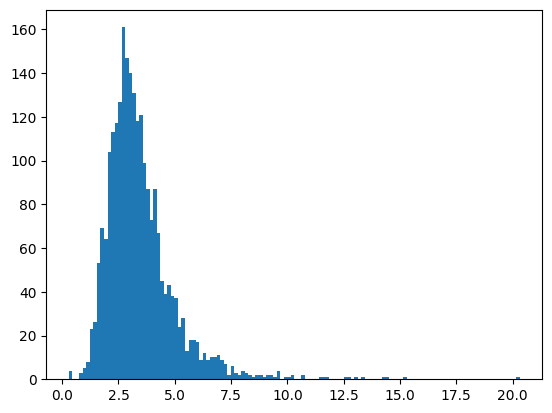

In [6]:
hist = plt.hist(permeabilities[4419], bins=128)

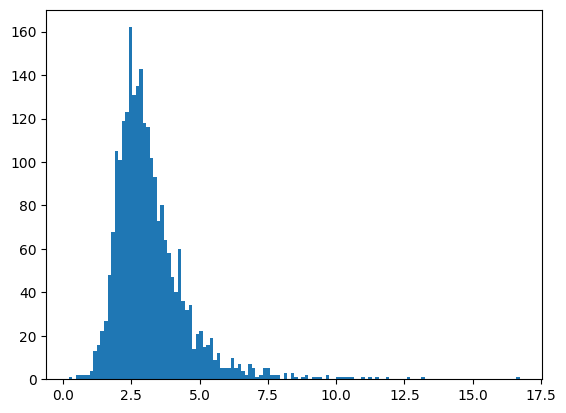

In [7]:
hist = plt.hist(permeabilities[4420], bins=128)